## **Statistical analysis and ML prediction of player value**

The used in this project was downloaded from kaggle,https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv 
and collected from the game FIFA 23 https://www.ea.com/games/fifa/fifa-23. 
Which is a well respected and established football game, that many rely on for doing statistical analysis on football players.  
It consists of statistics about more than 18000 players with 89 columns for each, ranging from descriptive statistics (metadata) such as name, age, nationality; to more predictive statistics such as a players overall rating and potential.
The data types in the columns include, nominal data, such as what club and what position they play at, numerical data, such as their overall rating. 
However, their is no continous data present, which may seem odd, but keep in mind that the overall rating and potential of a player is carefully constructed values from all types of continous data from the games they have played.
The input data, x-values, in the analysis will be a subset of all the columns present in the dataset. 
This subset will consists of parameters that I see fit and are most relevant for the analysis to achieve a good result. 
There will be a careful consideration of what parameter are relevant and not.

The target value, is a score for each player representing their market value. A players market value is an intrinsically subjective value. There is no de-facto value of a player, only estimates, until the player is bought by another club; and the purchase of a player is not an independent price and doesn't have to fully represent the player's market value, it could be subject to several different factors leading to the price being higher or lower than what it could've been. 

In [25]:
# Importing libraries and downloading data
import numpy as np
import pandas as pd
import scipy.stats as ss
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns

data = pd.read_csv('FIFA_23_Players_Data.csv')
data.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,11,2017,-,Left,3,4,4,-,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,1,2018,-,Left,3,1,4,Belgium,https://cdn.sofifa.net/flags/be.png,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,3

In [21]:
# Dropping the columns that are not needed
data.drop(columns=['Image Link', 'On Loan', 'National Team Image Link'], inplace=True)
data.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,Left,4,4,5,Argentina,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,Right,4,4,4,France,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,Right,4,4,5,Poland,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,Right,5,4,4,Belgium,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,Right,4,5,4,France,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,11,2017,Left,3,4,4,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,1,2018,Left,3,1,4,Belgium,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,22300000,GK,2024,1,2011,Right,4,1,5,Germany,GK,1,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,37,187,83,2159,445,Manchester United,220000,77900000,SUB,2023,7,2021,Right,4,5,5,Portugal,ST,7,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67

#### **Q-Q plot of the relation between the training data and the validation data**  
The three paramaters chosen for the plot:
* Age 
* Potential
* Market Value

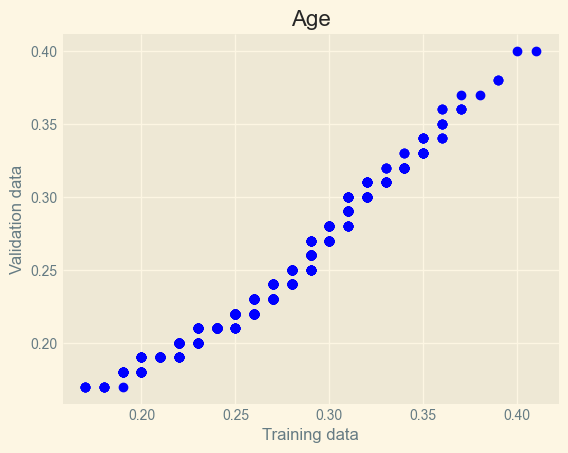

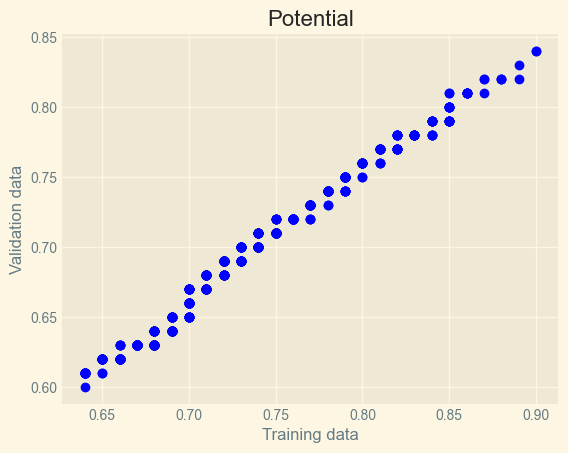

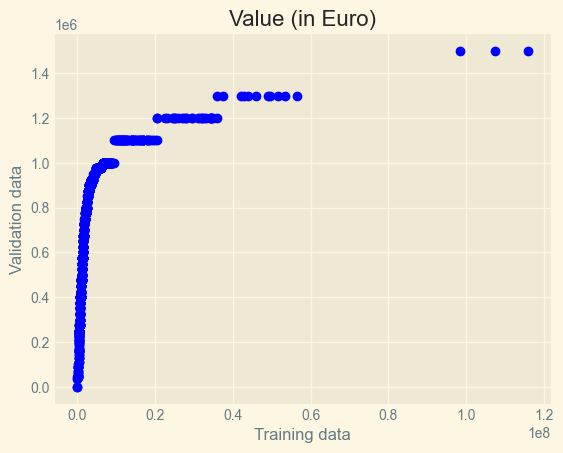

In [22]:
# TODO: should be refined
from random import sample
# Splitting the data into training and test data
split_point = int(0.80*len(data))
train_data = data[:split_point]
test_data = data[split_point:]

# Further splitting the training data into training and validation data, for qq-plot
split_point = int(0.80*len(train_data))
qq_train = train_data[:split_point]
qq_validation = train_data[split_point:]

def qq_plot(d1, d2, title: str, sample_size: int, norm=False):
    if norm:
        x = sample(list(map(lambda x: x * 0.01, d1)), sample_size)
        y = sample(list(map(lambda x: x * 0.01, d2)), sample_size)
    else:
        x = sample(d1, sample_size)
        y = sample(d2, sample_size)
    fig, ax = plt.subplots()
    ax.scatter(np.sort(x), np.sort(y), color='blue')
    ax.set_xlabel('Training data')
    ax.set_ylabel('Validation data')
    ax.set_title(title)

qq_plot(list(qq_train['Age']), list(qq_validation['Age']), 'Age', 1000, norm=True)
qq_plot(list(qq_train['Potential']), list(qq_validation['Potential']), 'Potential', 1000, norm=True)
qq_plot(list(qq_train['Value(in Euro)']), list(qq_validation['Value(in Euro)']), 'Value (in Euro)', 1000)

### **Problem statement**  
The goal of this project is to create two models that predict, from the given data, a football players market value. The result will be compared to established market value predictors and the comparison will act as an evaluation of how good the models are. Futhermore, there will be a careful statistical analysis of the data, in general and more specifically how it's used in the models, what parameters are of interest and how that can and will impact the results.  

The market value of players are of intereset for several reasons.
Mainly to put a label on a given player, the worth of a player, in an economical sense. 
Football is a sport as well as a business. 
In order to compete a club must develop and aquire new players. 
Statistical analysis have been a huge part of sports for many years now and carefully developed models can give a club a big edge over others, by for instance, finding and aquireing players below their *actual* market value, the process of what some could call "finding hidden gems".

### **Descriptive analysis**  
To give some more intuition and insight into the dataset, the histograms of some select variables will be shown.  

**Variables**
* Age
* Height in centimeters
* Weight in kilograms
* Pace Total (Acceleration, Sprint speed)
* Shooting Total (Positioning, Finishing, Shot Power, Long Shots, Volleys, Penalties)
* Passing Total (Vision, Crossing, FK. Accuracy, Short Passing, Long Passing, Curve)
* Dribbling Total (Agility, Balance, Reactions, Ball Control, Dribbling, Composure)
* Defending Total (Interceptions, Heading Acc., Def. Awareness, Standing Tackle, Sliding Tackle)
* Physicality Total (Jumping, Stamina, Strength, Aggression)  

What's worth discussing before analysing the varaibles with "Total" in them, is that these are an aggregated stat from all the other stats in the parentheses after them.
For instance, the "Shooting Total"-stat is some type of aggregated stat from the following stats.
Positioning, Finishing, Shot Power, Long Shots, Volleys and Penalties.
EA Sports (creators of FIFA 23) doesn't disclose how these total stats are computed exactly, but whats obvious is that is some type of weighted average.
Since we doesn't exactly know how these totals are computed, we will, in the prediction section, compute our own totals, but for now, these are insightful statistics to explore the dataset.

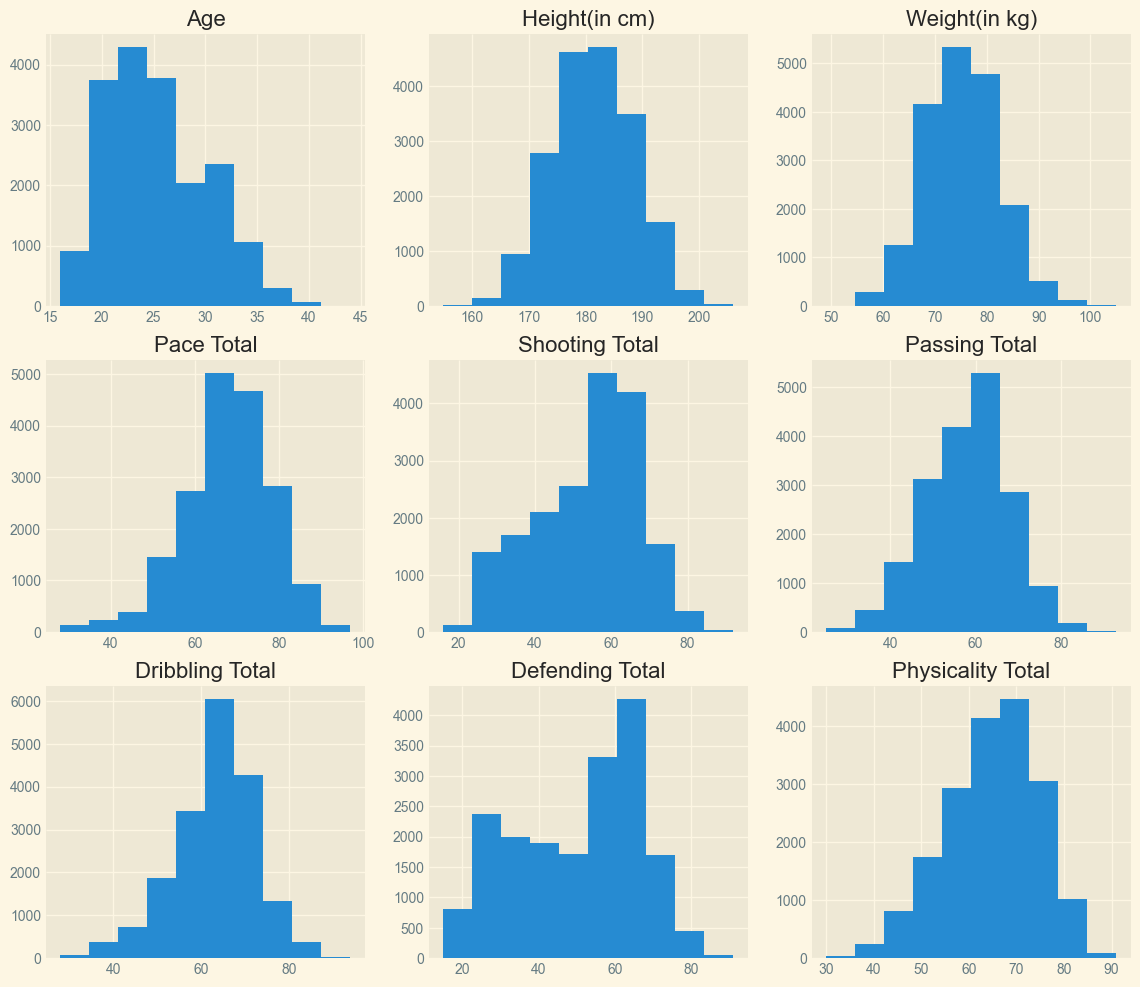

In [177]:
def plot_histograms(labels, data, density=False):
    fig, axes = plt.subplots(int(len(labels) / 3), 3, figsize=(14, 12))
    row = 0
    for i in range(len(labels)):
        if i != 0 and i % 3 == 0:
            row += 1
        axes[row, (i % 3)].set_title(labels[i])
        axes[row, (i % 3)].hist(data[labels[i]], density=density)

labels = ['Age', 'Height(in cm)', 'Weight(in kg)', 'Pace Total', 'Shooting Total', 
'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']

plot_histograms(labels, data)

As we can see, the histograms of most of the variables resembels a normal distribution, especially height and weight.
However, some are more skewed than others and there are some exceptions; Age and Defending Total. 
The distibution of Age resembles more of a Beta distibution.
Sport in general favors the young, football is no exception. 
It is much more common for clubs to bring in a young player, say in the range 16-22 other than older players, 35-40.
The reasons are quite obvious, younger players have more potential, are more physically fit and have a longer carrer ahead of them.
Defending have a more unique distribution.
One could view defending as the moste niche skill of all the skills listed above. And the distribution seems to back up that claim. Non-defenders doesn't nearly have the same defensive workload and due to this fact, that skill is valued less, especially for attackers.
However, the same niche-argument could be said about shooting.
We can observe that the distribution for Shooting Total is also more flat than others, but not to the same extent as defending. So there's definetly a correlation, but defending seems to be valued less for non-defensive players, than shooting for non-attacking players.

Other skills, like dribbling and passing, which are summed up by Dribbling Total and Passing Total looks to follow more of a normal distribution, even though it's discrete. These skills are more general, meaning that they are less positional related skills, i.e. they are valued almost equally independent of what position one plays. Thus it's more common for players to have stats closer to the mean value.


#### Dependent Variables  
Let's look at the dependence of some variables. 
The dependence of the variables in the aggregated variables, the "Total"-stats are obvious, but some are more dependent on each other than what others are. 
For more intereseting observations, let's look at the dependence of some variables that are cross-categorie, e.g. one from stat from Dribbling Total and one from Passing Total.

##### Finishing and Heading Accuracy
For strikers (red) and center backs (blue) respectively

<AxesSubplot: xlabel='Finishing', ylabel='Heading Accuracy'>

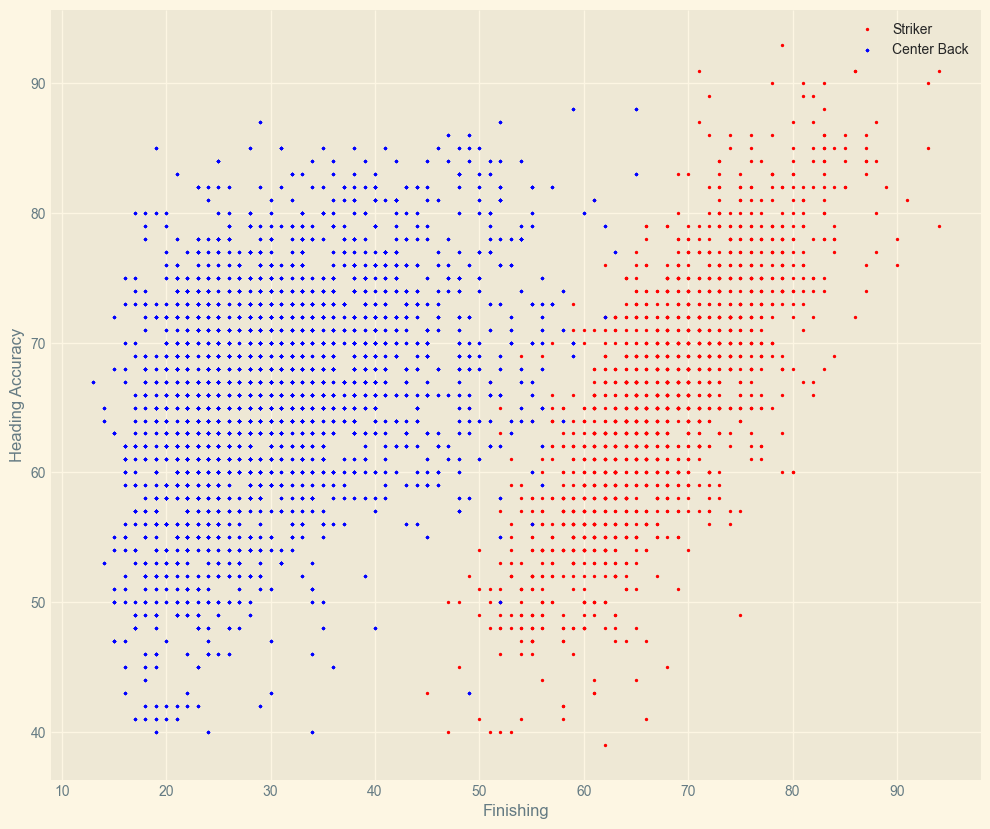

In [24]:
# Scatter Plot of x = long shots and y = fk. accuracy
# TODO: Maybe change this to seaborn
fig, ax = plt.subplots(1,1,figsize=(12, 10))
data.query("`Positions Played`=='ST'").plot(x="Finishing",
                                        y="Heading Accuracy",
                                        kind='scatter',
                                        label="Striker", marker="o", ax=ax, s=2, c="red")

data.query("`Positions Played`=='CB'").plot(x="Finishing",
                                        y="Heading Accuracy",
                                        kind='scatter',
                                        label="Center Back", marker="x", ax=ax, s=2, c="blue")

As the scatter plot show, both strikers and center backs have, generally, a high ability of heading. 
A striker having high heading accruacy may not come as a surprise, since their main objective is to score goals, and being a capable at heading the ball is a big part of it.
But the same way a striker needs to head the ball in order to score, the center back needs to challenge the striker in the air in order for him to score. 
Thus its a highly valuable skill for center back as well.
Finishing however, is more of a niche skill, defenders are not expected to have good finishing, since it is a very little part of their game, in general and especially compared to strikers. The scatter plot supports this claim, very few defenders have good finishing, only a small subset have more than 50, which isn't considered good.
While most strikers have high finishind, which is expected, since it's one of the most valuable skills for a striker.  

These variables are a good example of how certain abilities of a player is highly dependent on what position they play. A defenders market value isn't particularily dependent on their finishing ability, since it's not expected of them. While for a striker it's higly dependent.
Heading accuracy however, is a crucial ability for both positions and the plot supports that.

##### Correlation and Covariance

Covariance,  
$$cov(x,y) = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$$ 
where, $\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$  
Correlation,  
$$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}, -1 \le corr(x,y) \le 1$$ 
where $\sigma_x = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2}$

Text(0.5, 1.0, 'corr(Overall, Value)')

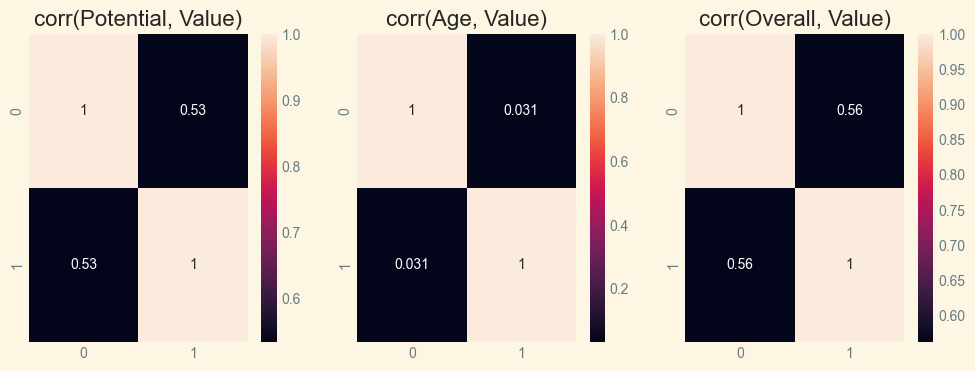

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

corr_pot_val = np.corrcoef(data['Potential'], data['Value(in Euro)'])
corr_age_val = np.corrcoef(data['Age'], data['Value(in Euro)'])
corr_ovr_val = np.corrcoef(data['Overall'], data['Value(in Euro)'])


sns.heatmap(corr_pot_val, annot=True, ax=axes[0])
sns.heatmap(corr_age_val, annot=True, ax=axes[1])
sns.heatmap(corr_ovr_val, annot=True, ax=axes[2])
axes[0].set_title("corr(Potential, Value)")
axes[1].set_title("corr(Age, Value)")
axes[2].set_title("corr(Overall, Value)")


<AxesSubplot: >

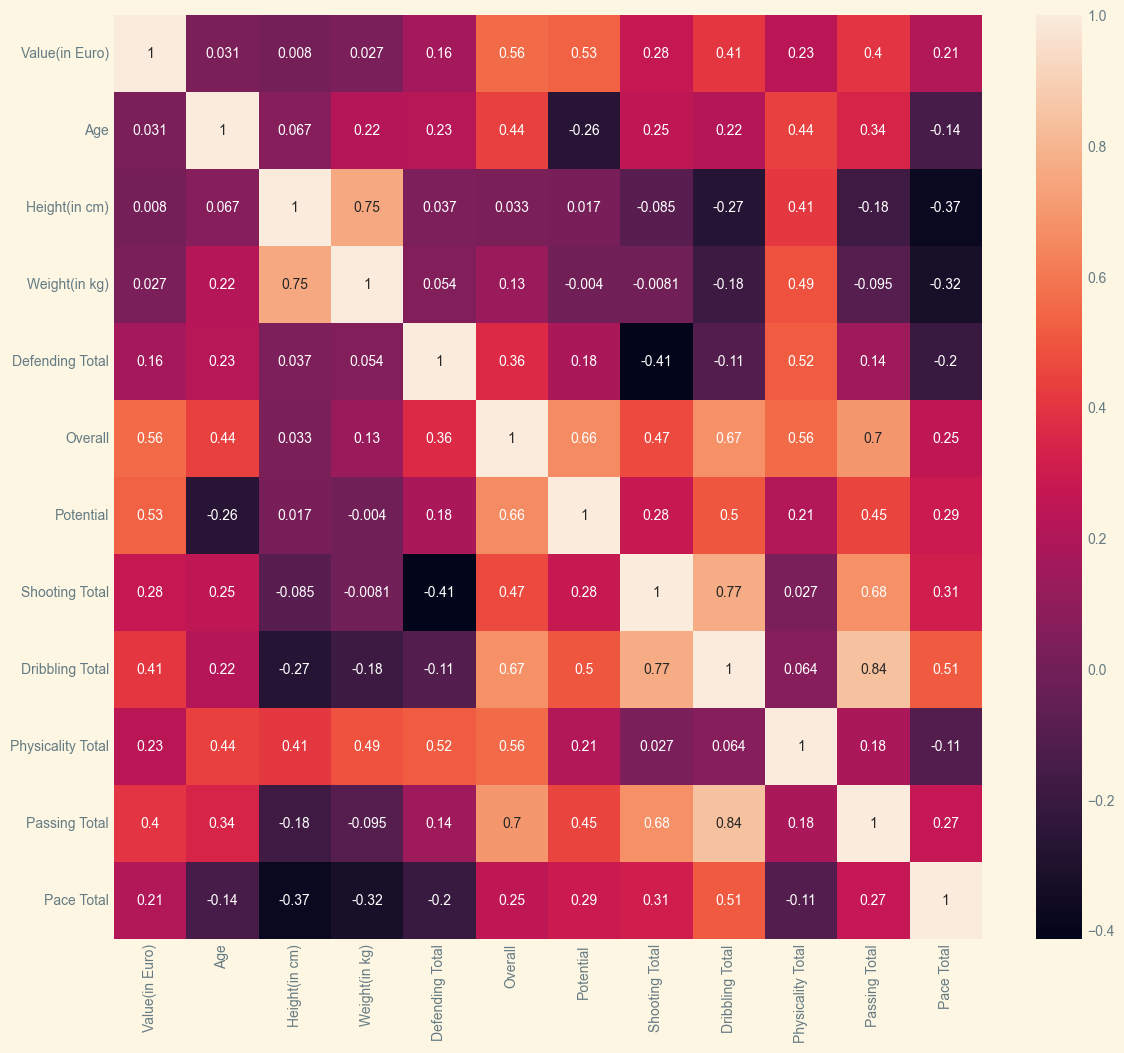

In [118]:
corr = data[['Value(in Euro)', 'Age', 'Height(in cm)',
            'Weight(in kg)', 'Defending Total', 'Overall',
            'Potential', 'Shooting Total', 'Dribbling Total',
            'Physicality Total', 'Passing Total', 'Pace Total']].corr(numeric_only=True)
fig, ax = plt.subplots(1, figsize=(14,12))
sns.heatmap(corr, annot=True, ax=ax)

Some interesting observations can be made from this heatmap of correlations between the displayed variables.
As one can see, not many variables have high correlation to the players market value.
The once with the highest correlation are the most comprehensive statistics, such as "Overall" and "Potential". 
This is not surprising at all, I would've even predicted a higher correlation, given the broad scope and descriptiveness of those two variables.
But this also goes to show that a players market value is a complex value in the sence that many parameters are at play.
We can also see that broader skills, meaning skills that are valuable at any position, such as "Dribbling Total" and "Passing Total" have a considerably higher correlation to market value than the more position-based skills, "Shooting Total" and "Defending Total". 
The physical attributes of a player, "Pace Total" and "Physicality Total" also have considerably lower correlation than the broad skills.
Which is an interesting observation, suggesting that football is a more skill-based sport than physical, which from a broad perspective makes sence.

Since height and weight have close to no correlation to a players market value and no strong correlation to other variables other than each other, these will be dropped from the prediction models.

#### Further exploration of the dataset

Let's dive deeper into some of the variables who's histograms was plotted above and get some further insight.

In [132]:
variables = ['Value(in Euro)', 'Age', 'Height(in cm)',
            'Weight(in kg)', 'Defending Total', 'Overall',
            'Potential', 'Shooting Total', 'Dribbling Total',
            'Physicality Total', 'Passing Total', 'Pace Total']

def print_descriptive_data(data, variables, exclude=[]):
    tmp_vars = []
    for variable in variables:
        if variable not in exclude:
            tmp_vars.append(variable)
        if len(tmp_vars) > 3:
            print(data[tmp_vars].describe())
            tmp_vars = []
    print(data[tmp_vars].describe())

print_descriptive_data(data, variables, exclude=['Value(in Euro)'])

                Age  Height(in cm)  Weight(in kg)  Defending Total
count  18539.000000   18539.000000   18539.000000     18539.000000
mean      25.240412     181.550839      75.173904        50.241383
std        4.718163       6.858097       7.013593        16.392532
min       16.000000     155.000000      49.000000        15.000000
25%       21.000000     177.000000      70.000000        36.000000
50%       25.000000     182.000000      75.000000        54.000000
75%       29.000000     186.000000      80.000000        64.000000
max       44.000000     206.000000     105.000000        91.000000
            Overall     Potential  Shooting Total  Dribbling Total
count  18539.000000  18539.000000    18539.000000     18539.000000
mean      65.852042     71.016668       53.777874        63.109553
std        6.788353      6.192866       13.619867         9.336566
min       47.000000     48.000000       16.000000        28.000000
25%       62.000000     67.000000       44.000000        58.00

As mentioned before, Overall, Potential and all "Total"-stats are possible values in the range 0-100, however, as we can see, the minimum values are seldom below 30. 
We can see a higher standard deviation for the more specific statistics, the "Total"-stats. 
While both Overall and Potential are more evenly distributed, which again is not surprising, given that they are more general statistics. 
We can also conclude that football is a young mans game, given that the mean age is around 25.2, here we also see the lowest standard deviation out of the variables.

##### Age and Market Value  
One surprising observation from the correlation heatmap was the correlation coefficient for age and player value. I thought that this would be much higher than the result 0.031, which suggests that there is close to no correlation at all.  

Let's take a closer look at the relationship between the two variables to see if there's anything the correlation coefficient missed.

[[1.         0.02563609]
 [0.02563609 1.        ]]


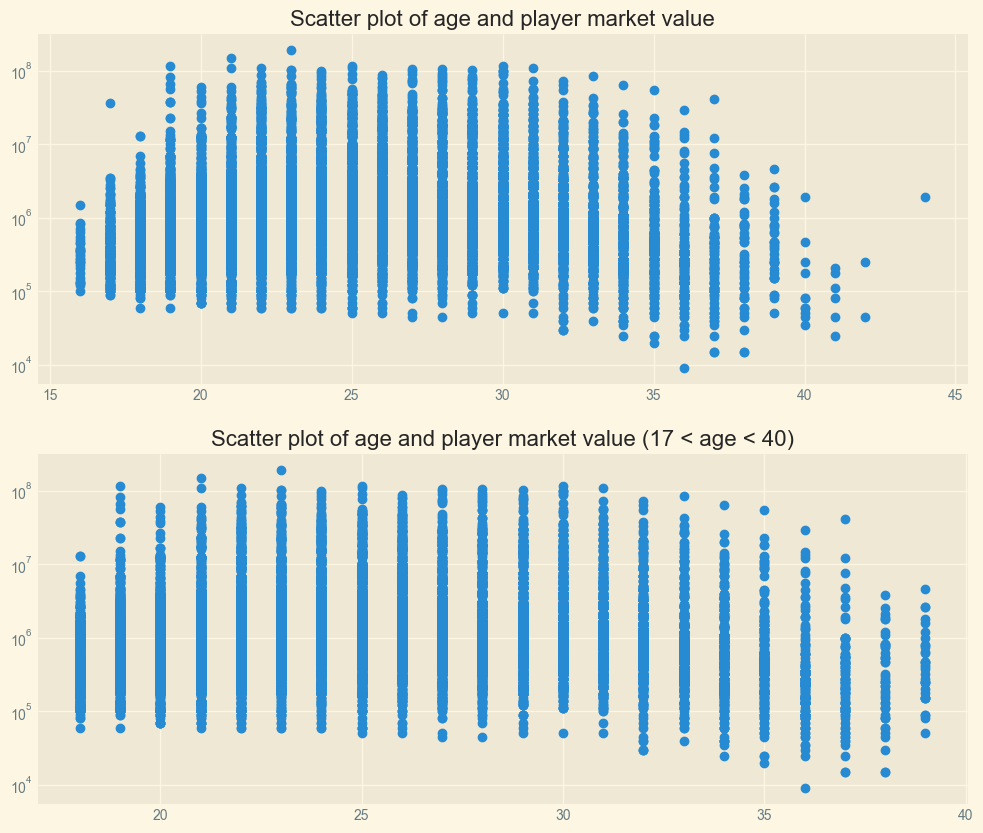

In [158]:
# Age and Market value

age = data['Age']
value = data['Value(in Euro)']
age_value = data.copy().query('Age > 17 & Age < 40')[['Age', 'Value(in Euro)']]
fig, axes = plt.subplots(2, figsize=(12,10))
axes[0].scatter(age, value)
axes[0].set_yscale('log')
axes[0].set_title('Scatter plot of age and player market value')
axes[1].scatter(age_value['Age'], age_value['Value(in Euro)'])
axes[1].set_yscale('log')
axes[1].set_title('Scatter plot of age and player market value (17 < age < 40)')
print(np.corrcoef(age_value['Age'], age_value['Value(in Euro)']))

Text(0.5, 1.0, "Player's general position distribution (exluding GK)")

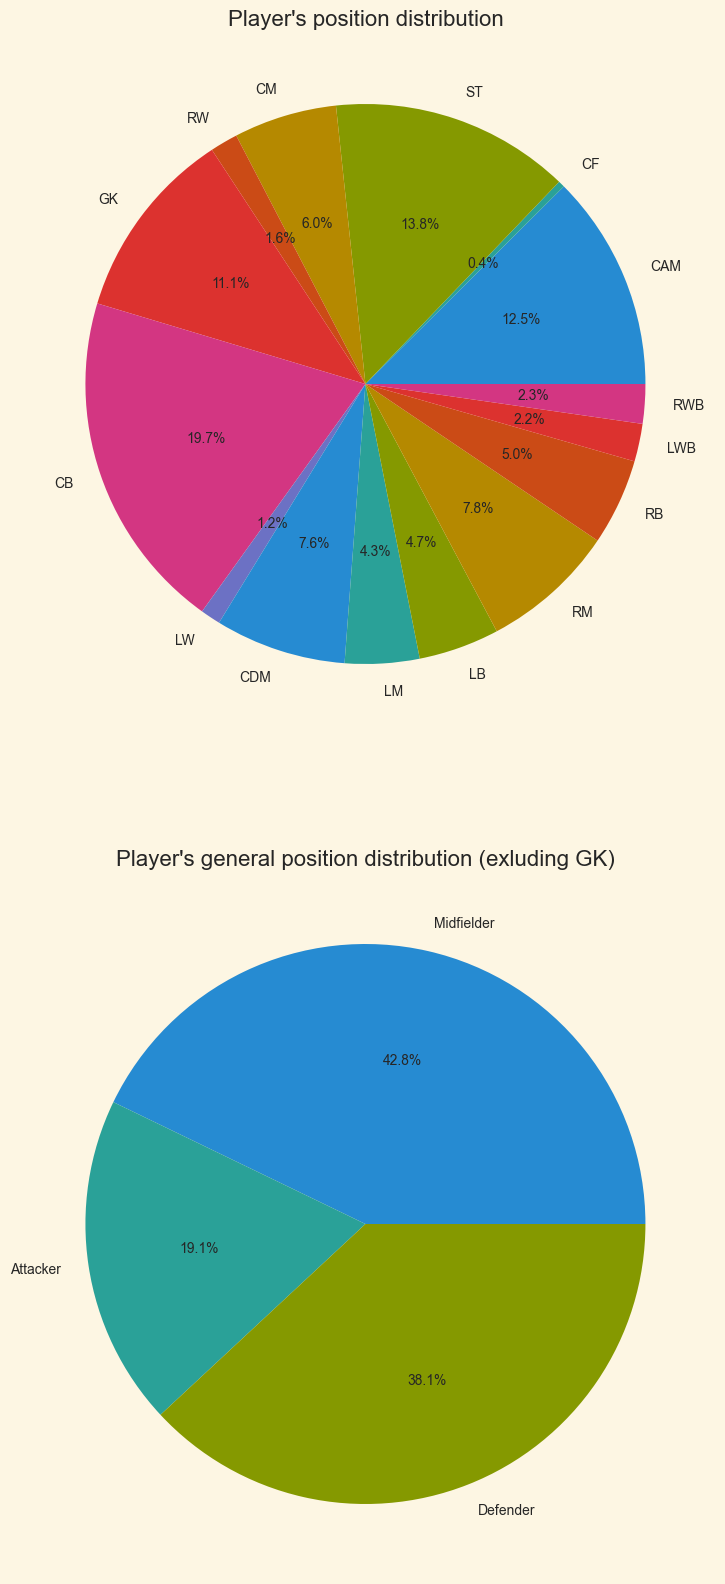

In [146]:
from collections import Counter
from collections import defaultdict
# Pie chart of positions
# We use "Best Position" and not "Positions Played" to extract a unique value for each player
positions = data['Best Position']
counts = Counter(positions)

# Grouping positions by general position 
def group_positions(positions):
    attacker = ['ST', 'CF', 'RW', 'LW'] 
    midfielder = ['CM', 'CAM', 'CDM', 'RM', 'LM']
    defender = ['CB', 'RB', 'RWB', 'LB', 'LWB']
    result = defaultdict(int)
    for key, val in positions.items():
        if key in attacker:
            result['Attacker'] += val
        elif key in midfielder:
            result['Midfielder'] += val
        elif key in defender:
            result['Defender'] += val
        # Exluding GK
        else:
            continue
    return result

general_positions = group_positions(counts)
fig, axes = plt.subplots(2, figsize=(12,20))
axes[0].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
axes[0].set_title('Player\'s position distribution')
axes[1].pie(general_positions.values(), labels=general_positions.keys(), autopct='%1.1f%%')
axes[1].set_title('Player\'s general position distribution (exluding GK)')

The distribution of positions are not particularily even, when looking at all possible positions. 
However, when grouping them up, it's more evenly distributed. 
Note here that we excluded goalkeepers, since we won't include them in our predictive models.
Although, there are more noteably more defenders and midfielders than attackers, I don't think it will have a negative effect on the predictive models.
One problem could be that the model are more biased for defenders and midfielders, but I think that attackers will be the easiest to predict, so I don't think it will be a problem. 
But it's worth noting.

##### Mean value of player market value, each position

<BarContainer object of 15 artists>

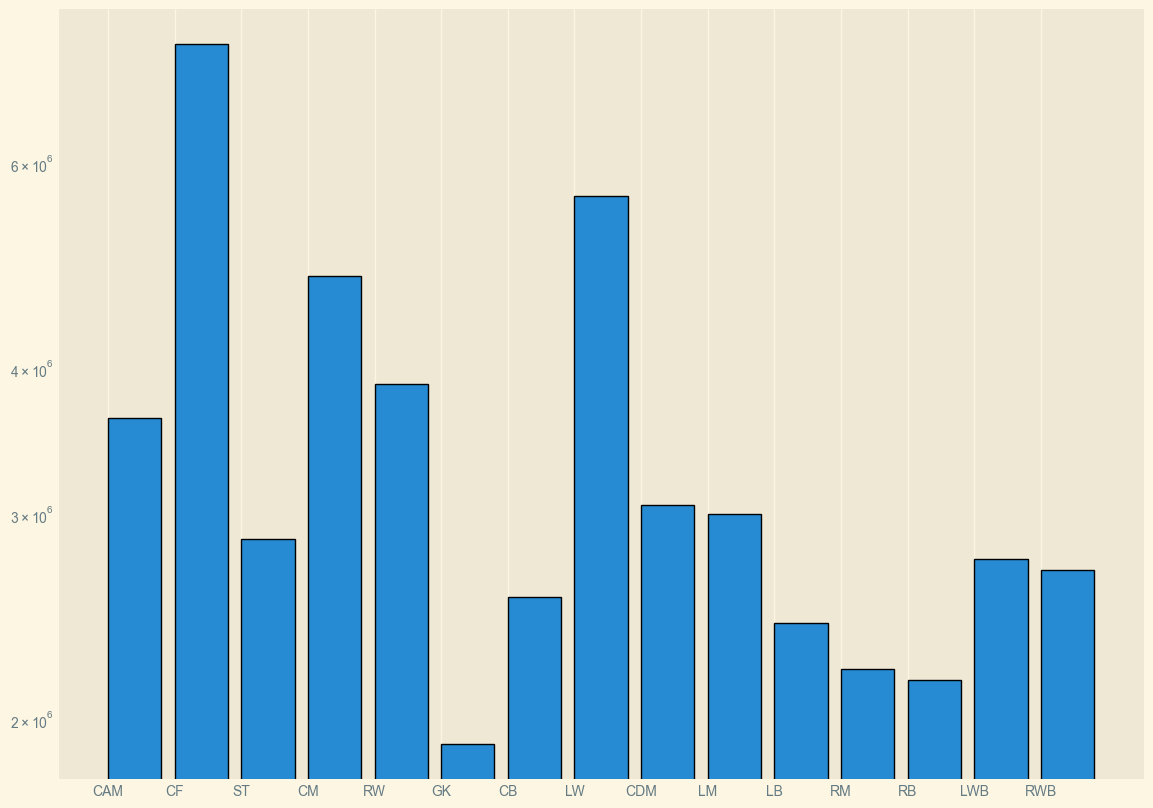

In [166]:
def mean_val_per_pos(data):
    pos_data = data['Best Position']
    res = {}
    for pos in pos_data.unique():
        res[pos] = data.query("`Best Position`==@pos")['Value(in Euro)'].mean()
    return res

mean_vals = mean_val_per_pos(data)
fig, ax = plt.subplots(1, figsize=(14,10))
ax.bar(data['Best Position'].unique(), mean_vals.values(), 
        align='edge', log=True, edgecolor='black')

#### 3D Plot of Player Potential, Overall and Market Value

In [234]:
import plotly.express as pex
fig = pex.scatter_3d(data.head(15), x='Potential', y='Overall', z='Value(in Euro)', color='Known As')
fig.show()
#ax.set_title("3D Plot of Player Potential, Overall and Market Value")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### **Probability distribution**  
We are going to investigate the following variables further. 
* Passing Total
* Physicality Total
* Shooting Total
* Dribbling Total
* Defending Total
* Pace Total  

Since all this data is discrete, we are going to model their probability mass functions.
Unfortunately there are no continous data present in the datset, so we will not reach further nuance in what proability distributions to investigate.

<BarContainer object of 28 artists>

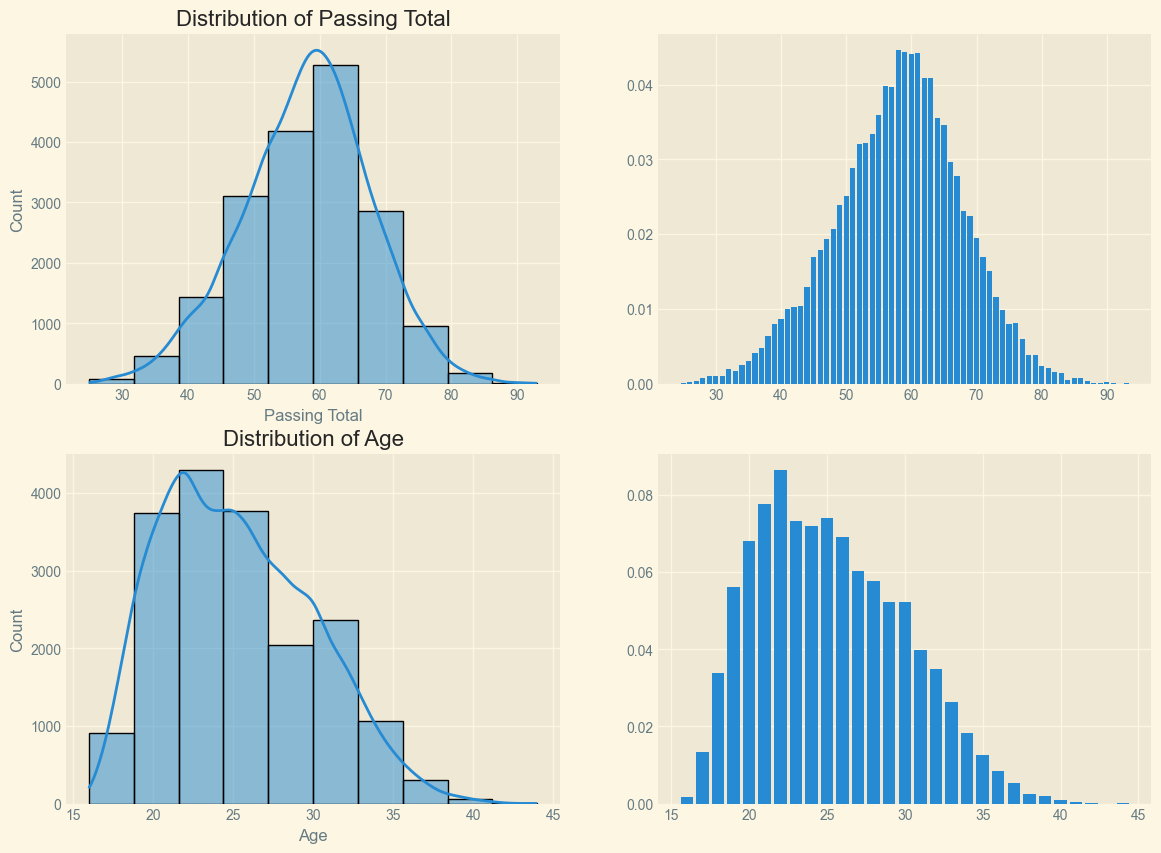

In [227]:
# Passing Total
ps = data['Passing Total']
age_data = data['Age']
probs_ps = ps.value_counts(normalize=True)
probs_age = age_data.value_counts(normalize=True)
fig, axes = plt.subplots(2,2, figsize=(14,10))
sns.histplot(ps, kde=True, bins=10, ax=axes[0,0])
axes[0,0].set_title('Distribution of Passing Total')
axes[0,1].bar(probs_ps.index, probs_ps.values)
sns.histplot(age_data, kde=True, bins=10, ax=axes[1,0])
axes[1,0].set_title('Distribution of Age')
axes[1,1].bar(probs_age.index, probs_age.values)
#ax.plot(data['Passing Total'])

Since the data is discrete, and in the case of "Passing Total" each random variable **x** can take on any value in the range of 1-100, this is a categorical or multinolli distribution. 
However, the plot of the PMF takes on an interesting structure, as stated before, the data seems to resemble the shape of a normal distribution, and here emphasis lies on the owrd **resemble** since we are talking about discrete data and not continous, which a normal distribution models.
However, we can observe that the most common attributes for a player lies around the mean value and that the further one comes from the mean value, it is an increasing decline in the probability of such a random variable occuring. 
And this decline looks almost the same one both sides of the mean value. 

As discussed before, the PMF of age shows that football favors the young. 
The reasons behind this is quite obvious, since the life time of a footballer isn't particularily long and the competitiveness of the sport at a proffesional level makes it difficult to stay relevant through the trial and tribulations of aging and more specifically the effect it has on someones physique.

Hypoteses test: 

Parameter estimation :-> MLE or MAP


### **Predictive analysis**

#### Feature Selection and Engineering

In [216]:
import statsmodels.api as sm

# Testing for all numeric data except Value
X_all = data.copy().select_dtypes(include=np.number).drop(columns=["Value(in Euro)"])
y_all = data['Value(in Euro)']

X_all = sm.add_constant(X_all)
model = sm.OLS(y_all, X_all).fit()


def regression_model(data, params, exlude=[]):
    pass

params = ['Age', 'Potential', 'Pace Total', 'Shooting Total', 
'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']
predict_data = train_data.copy()
# Dropping Goalkeepers
predict_data = predict_data[predict_data["Best Position"].str.contains("GK")==False]
# Cleaning the data further, removing players with 0 market value
predict_data = predict_data[predict_data["Value(in Euro)"] != 0]
X = predict_data[params]
y = predict_data['Value(in Euro)']
y_log = np.log(y)

X = sm.add_constant(X)

non_log_model = sm.OLS(y, X).fit()
log_model = sm.OLS(y_log, X).fit()
#non_log_model.summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     7513.
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:12:09   Log-Likelihood:            -2.8984e+05
No. Observations:               18539   AIC:                         5.798e+05
Df Residuals:                   18476   BIC:                         5.803e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.795e+07   1.13e+07      3.350      0.001    1.57e+07    6.02e+07
Overall                   7.024e+04   6871.581     10.221      0.000    5.68e+04    8.37e+04
Potential                -2.662e+04   4440.917     -5.995      0.000   -3.53e+04   -1.79e+04
Age                      -8.127e+04   5456.109    -14.894      0.000    -9.2e+04   -7.06e+04
Height(in cm)             6121.9352   3179.683      1.925      0.054    -110.537    1.24e+04
Weight(in kg)             -896.6322   2734.847     -0.328      0.743   -6257.185    4463.921
TotalStats               -1136.3617   2143.916     -0.530      0.596   -5338.636    3065.913
BaseStats                  736.3460   1968.162      0.374      0.708   -3121.433    4594.125
Wage(in Euro)               38.5898      1.059     36.433      0.000      36.514      40.666
Release Clause               0.4427      0.001    343.566      0.000       0.440       0.445
Joined On                -2.034e+04   5592.864     -3.637      0.000   -3.13e+04   -9377.261
Weak Foot Rating          3365.3158   1.78e+04      0.189      0.850   -3.15e+04    3.82e+04
Skill Moves               7.801e+04   2.69e+04      2.900      0.004    2.53e+04    1.31e+05
International Reputation  8.467e+05    4.4e+04     19.244      0.000     7.6e+05    9.33e+05
Pace Total                9927.4225   8051.218      1.233      0.218   -5853.708    2.57e+04
Shooting Total           -6066.6004   9410.037     -0.645      0.519   -2.45e+04    1.24e+04
Passing Total             5284.3934   6591.676      0.802      0.423   -7635.901    1.82e+04
Dribbling Total          -6668.1861   9006.023     -0.740      0.459   -2.43e+04     1.1e+04
Defending Total           7067.4435   7560.586      0.935      0.350   -7752.004    2.19e+04
Physicality Total        -8808.1268   5092.995     -1.729      0.084   -1.88e+04    1174.614
Crossing                  4702.1341   5050.794      0.931      0.352   -5197.889    1.46e+04
Finishing                 3541.1793   6530.349      0.542      0.588   -9258.908    1.63e+04
Heading Accuracy         -1978.0304   3336.609     -0.593      0.553   -8518.093    4562.032
Short Passing             3051.9940   5909.698      0.516      0.606   -8531.559    1.46e+04
Volleys                   2267.2640   2770.160      0.818      0.413   -3162.506    7697.034
Dribbling                 5050.0624   7457.138      0.677      0.498   -9566.617    1.97e+04
Curve                     2616.7299   2780.370      0.941      0.347   -2833.052    8066.512
Freekick Accuracy          569.7500   2699.345      0.211      0.833   -4721.216    5860.716
LongPassing                222.4640   4403.160      0.051      0.960   -8408.136    8853.064
BallControl               3768.4845   7161.502      0.526      0.599   -1.03e+04    1.78e+04
Acceleration  

In [210]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     9223.
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:16:01   Log-Likelihood:                -7437.9
No. Observations:               13324   AIC:                         1.489e+04
Df Residuals:                   13315   BIC:                         1.496e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4612      0.074     -6.234      0.000      -0.606      -0.316
Age                   0.0163      0.001     13.198      0.000       0.014       0.019
Potential             0.1401      0.001    147.668      0.000       0.138       0.142
Pace Total            0.0075      0.000     17.528      0.000       0.007       0.008
Shooting Total        0.0030      0.001      5.191      0.000       0.002       0.004
Passing Total         0.0070      0.001      7.359      0.000       0.005       0.009
Dribbling Total       0.0228      0.001     20.941      0.000       0.021       0.025
Defending Total       0.0038      0.000      8.990      0.000       0.003       0.005
Physicality Total     0.0214      0.001     39.146      0.000       0.020       0.022
==============================================================================
Omnibus:                      938.741   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1439.289
Skew:                          -0.571   Prob(JB):                         0.00
Kurtosis:                       4.134   Cond. No.                     3.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### XGBoost

In [219]:
import xgboost as xgb

test = test_data.copy()
test = test[test["Best Position"].str.contains("GK")==False]
test = test[test["Value(in Euro)"] != 0]

X_test = test[params]
y_test = np.log(test["Value(in Euro)"])

# Convert data to DMatrix format, which is used by XGBoost
d_train = xgb.DMatrix(X, label=y_log)
d_test = xgb.DMatrix(X_test, label=y_test)

# Defining the parameters for XGBoost
xgb_params = {'max_depth': 3, 'eta': 0.1, 'objective': 'reg:squarederror'}

# Train the model
xgb_model = xgb.train(xgb_params, d_train)

# Make the model predict the test set
predictions = xgb_model.predict(d_test)

# Evaluation of the model
accuracy = sum(predictions == y_test) / len(y_test)
print('Accuracty:', accuracy)

ValueError: feature_names mismatch: ['const', 'Age', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total'] ['Age', 'Potential', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']
expected const in input data

### **Conclusion**